In [8]:
import sys
import os
import time
import numpy as np
import pandas as pd
import json
import tempfile
import argparse
import cmdline_provenance as cmdprov
import xarray as xr
sys.path.append(f'{os.getcwd()}/ACS_added_value/added-value-evaluation/bin')
import lib
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

In [9]:
ifile_tmpl = "/g/data/tp28/cst565/ACS_added_value/{measure}_{var}_{gcm}_{scenario}_BARPA-R_AGCD_day_{region}_{season}_*-*.nc"

In [10]:
measures = ["AVse"]
vars = ["tasmax", "tasmin", "pr"]
gcms = ["ACCESS-CM2", "ACCESS-ESM1-5", "EC-Earth3", "NorESM2-MM"]
scenarios = ["historical"]
regions = ["Australia"]
seasons = ["annual", "DJF", "MAM", "JJA", "SON"]

In [15]:
ds = []
for measure in measures:
    ds_var = []
    for var in vars:
        ds_gcm = []
        for gcm in gcms:
            ds_scen = []
            for scen in scenarios:
                ds_region = []
                for region in regions:
                    ds_seas = []
                    for seas in seasons:
                        ifile = ifile_tmpl.format(measure=measure, var=var, gcm=gcm, scenario=scen, region=region, season=seas)
                        print(ifile)
                        _ds = xr.open_mfdataset(ifile)
                        ds_seas.append(_ds)
                    ds_seas = xr.concat(ds_seas, pd.Index(seasons, name="season"))
                    ds_region.append(ds_seas)
                ds_region = xr.concat(ds_region, pd.Index(regions, name="region"))
                ds_scen.append(ds_region)
            ds_scen = xr.concat(ds_scen, pd.Index(scenarios, name="scenario"))
            ds_gcm.append(ds_scen)
        ds_gcm = xr.concat(ds_gcm, pd.Index(gcms, name="gcm"))
        ds_var.append(ds_gcm)
    ds_var = xr.concat(ds_var, pd.Index(vars, name="variable"))
    ds.append(ds_var)
ds = xr.concat(ds, pd.Index(measures, name="measure"))

/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-CM2_historical_BARPA-R_AGCD_day_Australia_annual_*-*.nc
/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-CM2_historical_BARPA-R_AGCD_day_Australia_DJF_*-*.nc
/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-CM2_historical_BARPA-R_AGCD_day_Australia_MAM_*-*.nc
/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-CM2_historical_BARPA-R_AGCD_day_Australia_JJA_*-*.nc
/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-CM2_historical_BARPA-R_AGCD_day_Australia_SON_*-*.nc
/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-ESM1-5_historical_BARPA-R_AGCD_day_Australia_annual_*-*.nc
/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-ESM1-5_historical_BARPA-R_AGCD_day_Australia_DJF_*-*.nc
/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-ESM1-5_historical_BARPA-R_AGCD_day_Australia_MAM_*-*.nc
/g/data/tp28/cst565/ACS_added_value/AVse_tasmax_ACCESS-ESM1-5_historical_BARPA-R_AGCD_day_Australia_JJA_*-*.nc
/g/data/tp

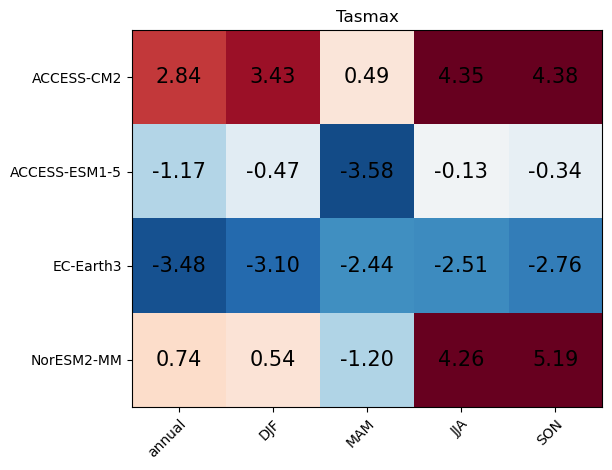

In [12]:
fig = lib.heatmap(ds["av"].sel(variable="tasmax"), xdim="season", ydim="gcm", cmap="RdBu_r", vmin=-4, vmax=4, title="Tasmax")

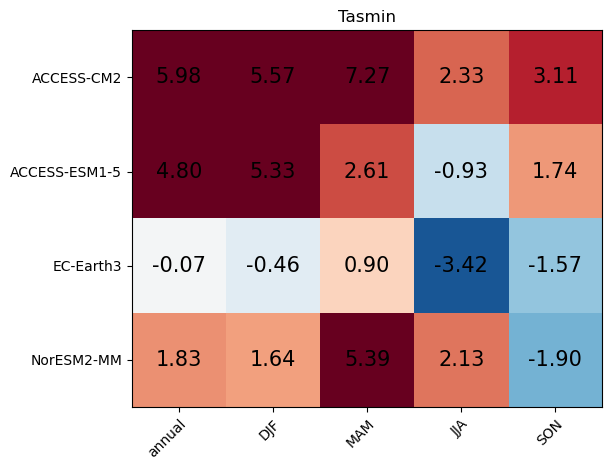

In [13]:
fig = lib.heatmap(ds["av"].sel(variable="tasmin"), xdim="season", ydim="gcm", cmap="RdBu_r", vmin=-4, vmax=4, title="Tasmin")

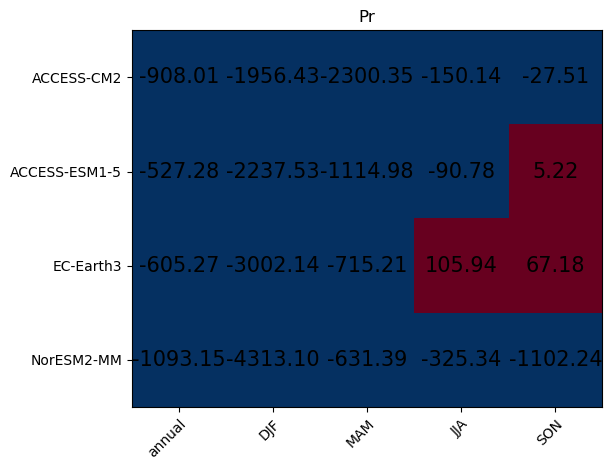

In [14]:
fig = lib.heatmap(ds["av"].sel(variable="pr"), xdim="season", ydim="gcm", cmap="RdBu_r", vmin=-4, vmax=4, title="Pr")